# Water Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.shape

(3276, 10)

In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<AxesSubplot:>

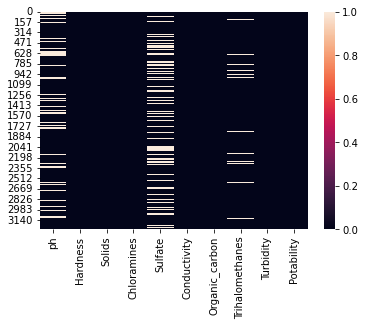

In [11]:
sns.heatmap(df.isnull())

<AxesSubplot:>

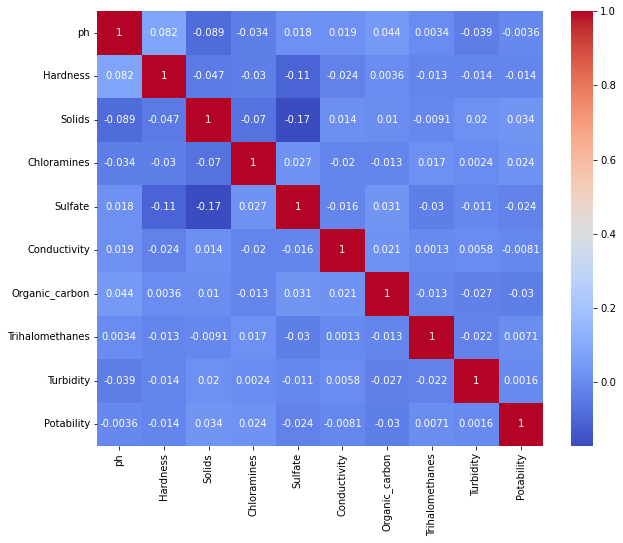

In [12]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [13]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

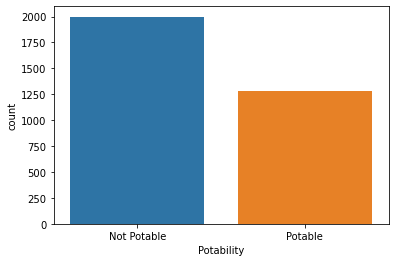

In [14]:
sns.countplot(x = 'Potability', data = df, saturation = 0.8)
plt.xticks(ticks = [0, 1], labels = ['Not Potable', 'Potable'])
plt.show()

In [15]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:xlabel='Potability', ylabel='ph'>

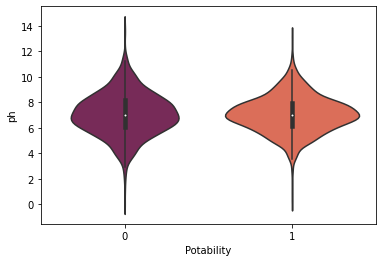

In [16]:
sns.violinplot(x = 'Potability', y = 'ph', data = df, palette = 'rocket')

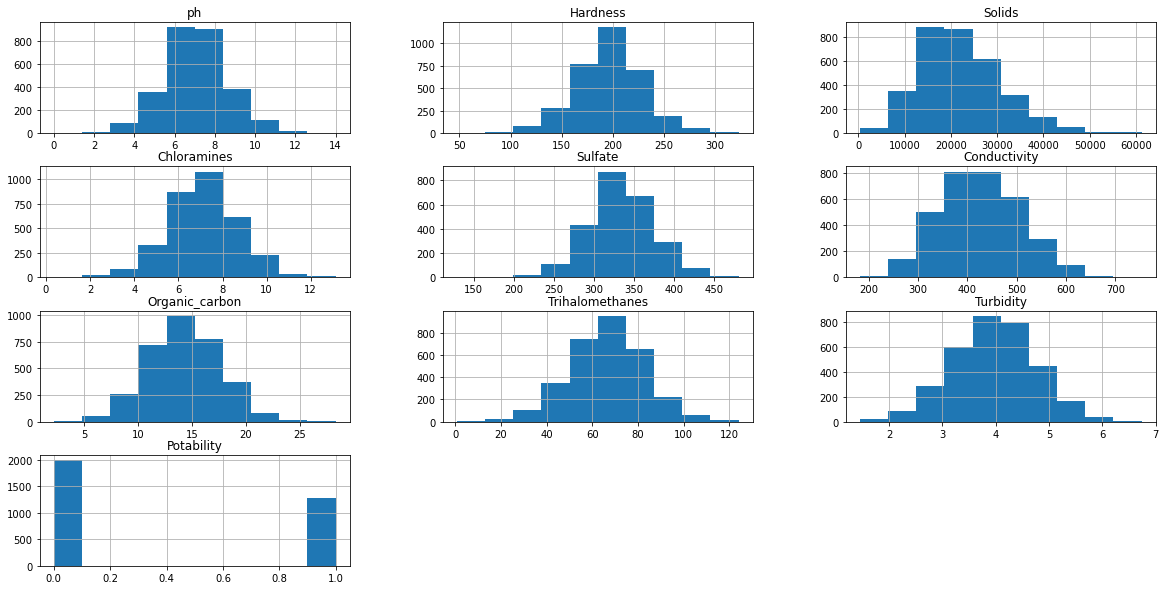

In [17]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

**matplotlib.rcParams** contains some properties in matplotlibrc file. We can use it to control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on.

<Figure size 1440x720 with 0 Axes>

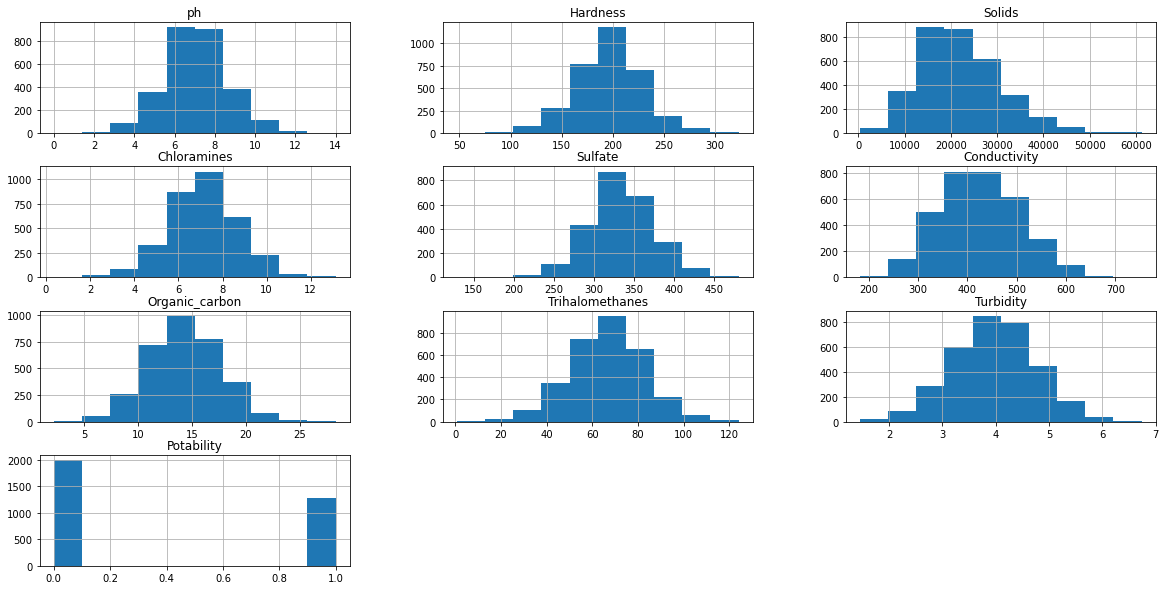

In [18]:
plt.figure(figsize = (20, 10))
df.hist()
plt.show()

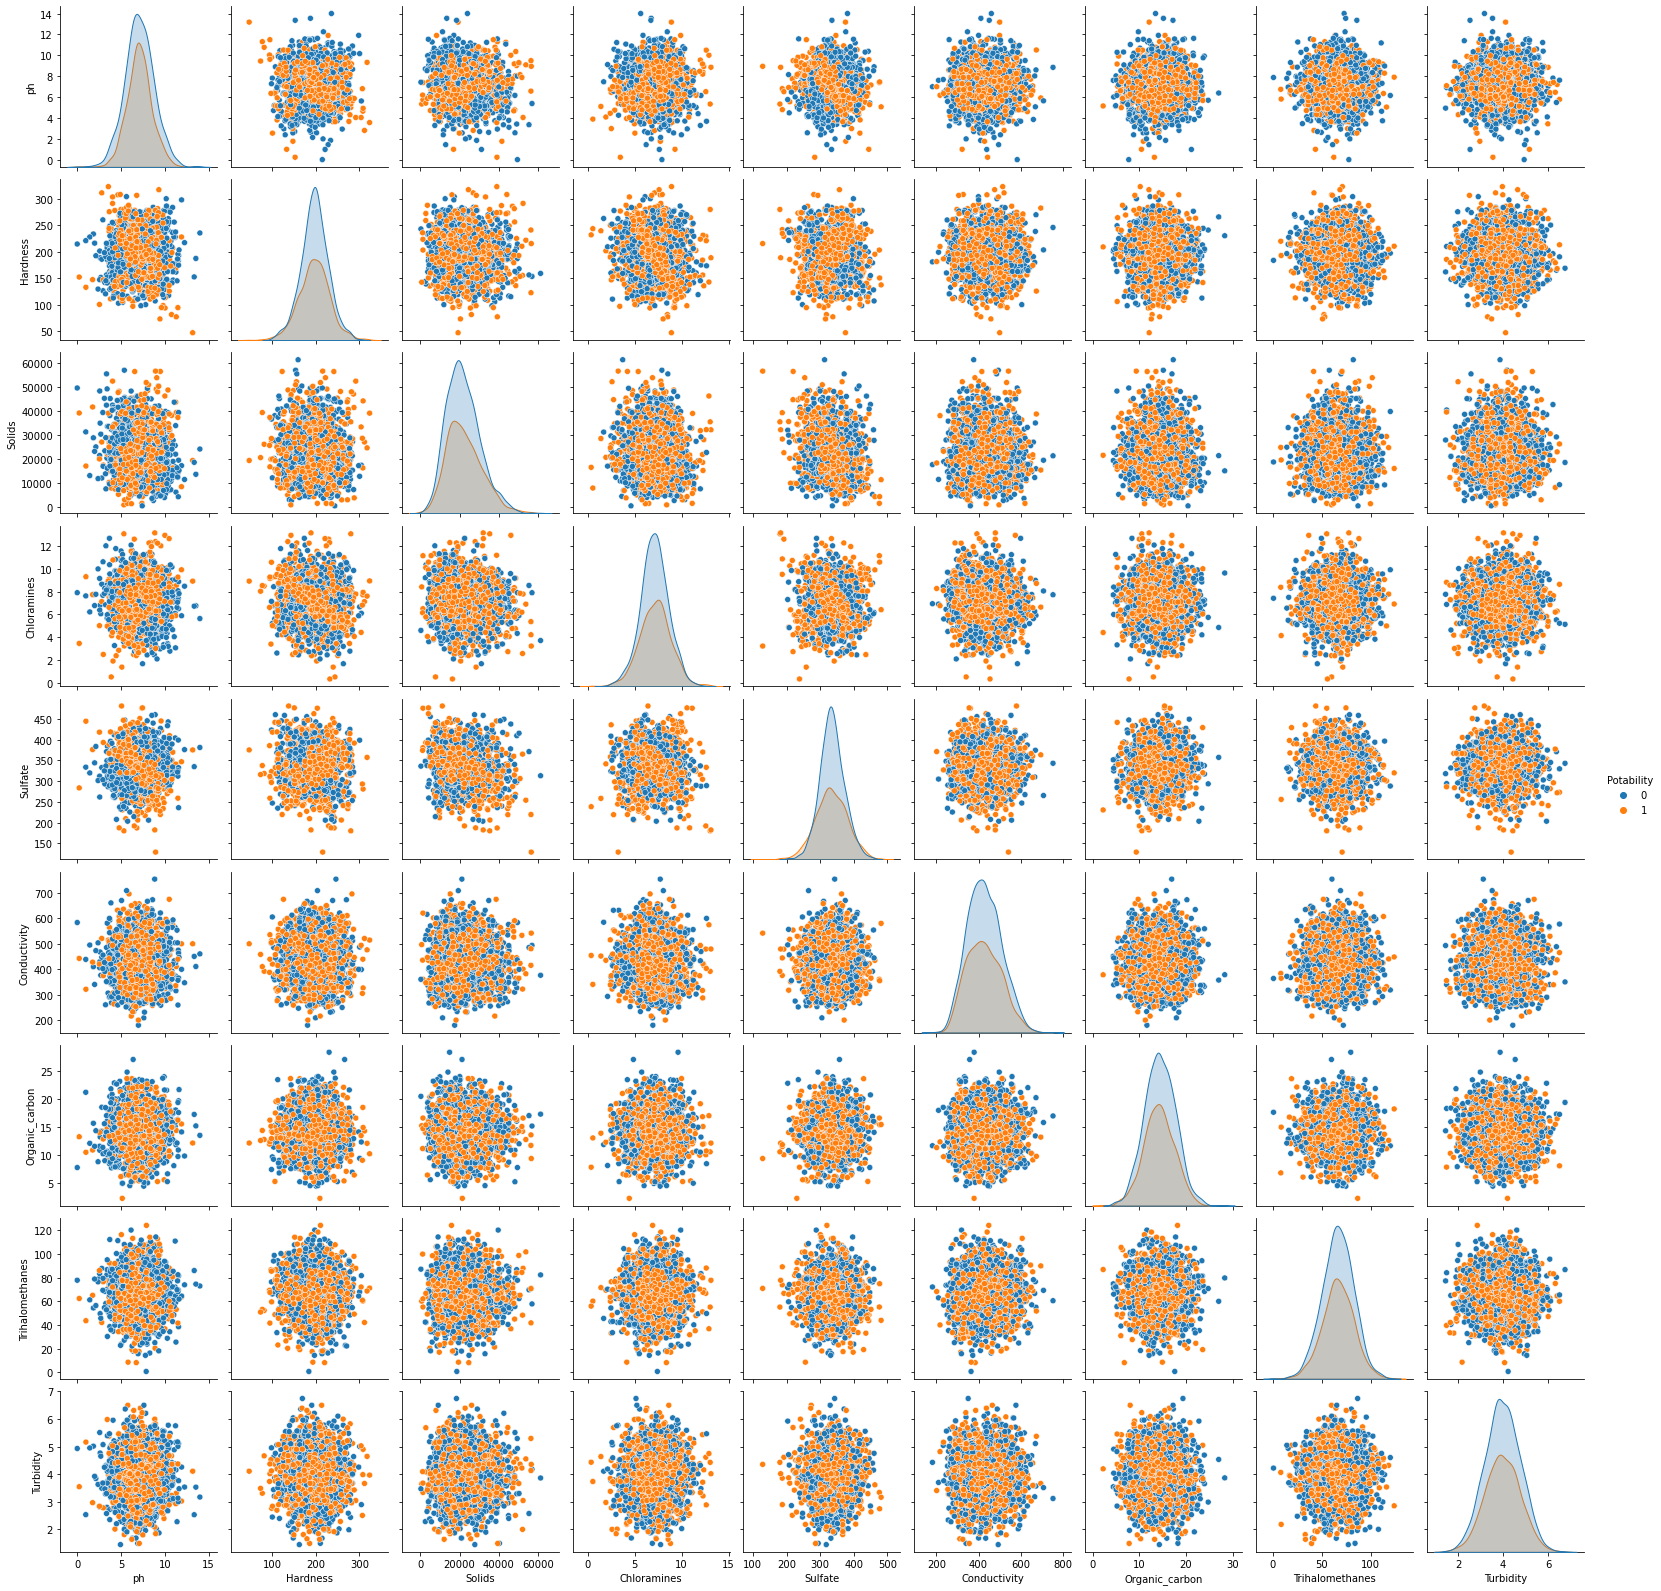

In [19]:
sns.pairplot(df, hue = 'Potability')

<AxesSubplot:xlabel='Potability', ylabel='Density'>

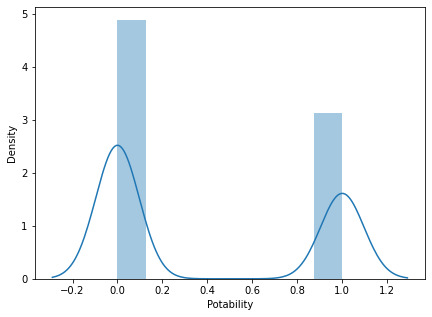

In [20]:
plt.figure(figsize = (7, 5))
sns.distplot(df['Potability'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

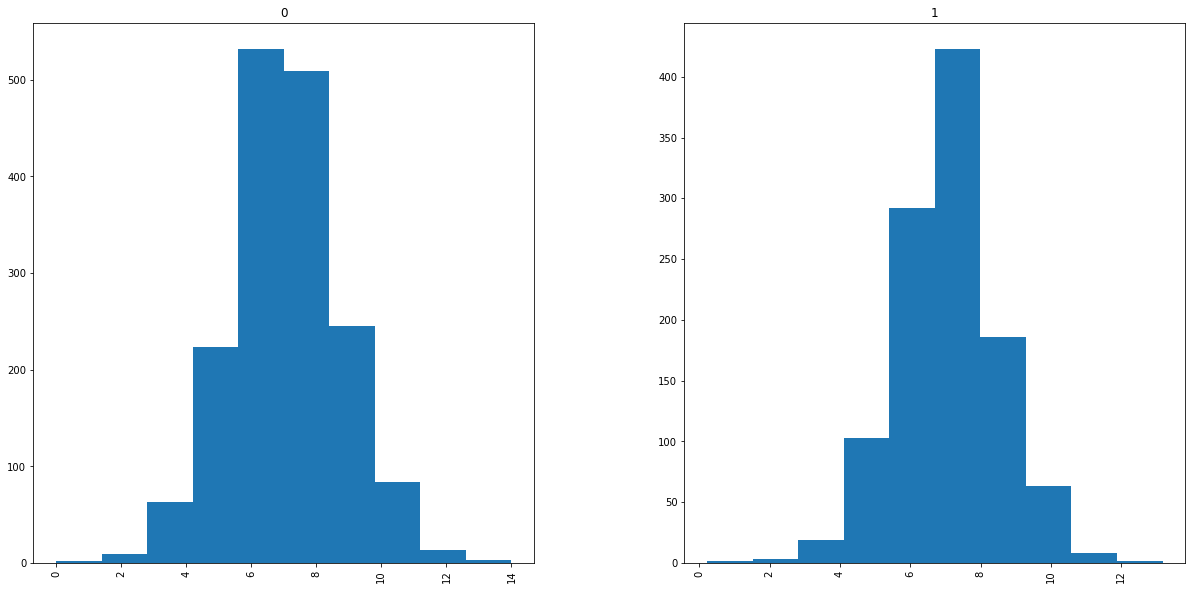

In [21]:
df.hist(column = 'ph', by = 'Potability')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

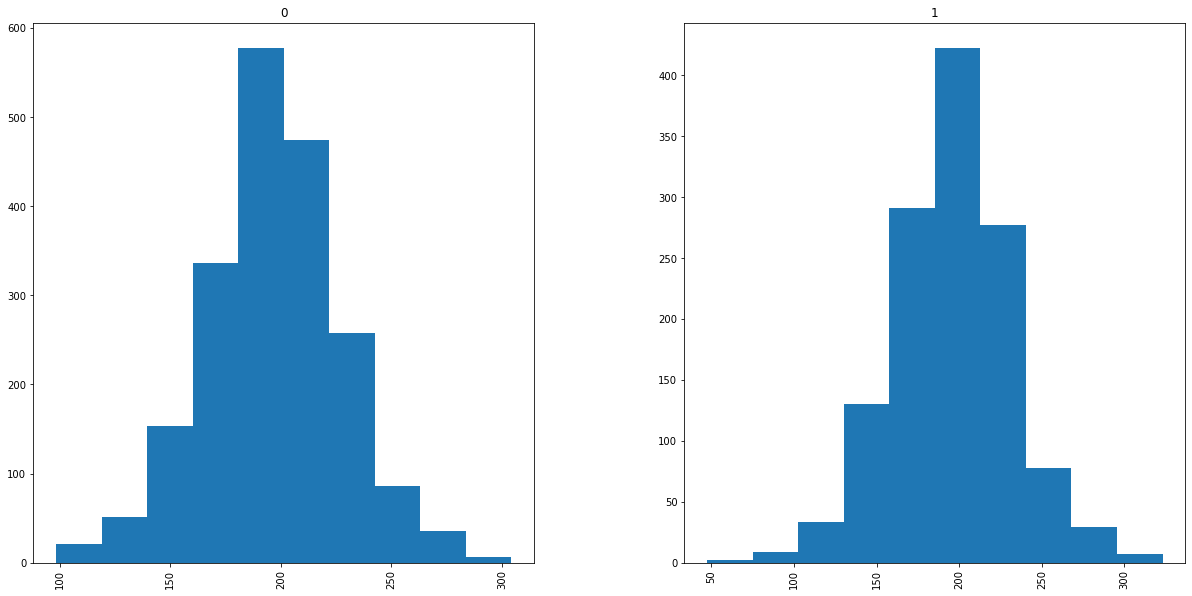

In [22]:
df.hist(column = 'Hardness', by = 'Potability')

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

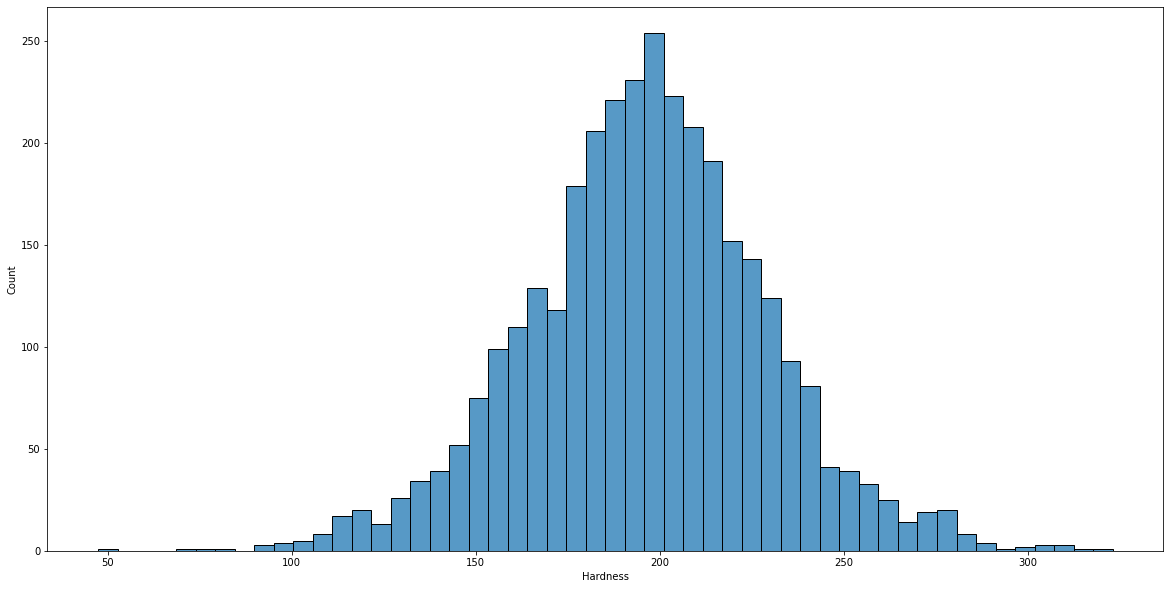

In [23]:
sns.histplot(x = 'Hardness', data = df)

In [24]:
df.skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64

In [25]:
skew_val = df.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.025630
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.035947
Hardness          -0.039342
Trihalomethanes   -0.083031
dtype: float64

- Using pandas skew function to check the correlation between the values.
- Values between 0.5 to -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

# Plotly

### Box Plot

In [26]:
px.box(df, x=df.Potability, y=df.ph, color=df.Potability, width=600, height=400)

In [27]:
px.box(df, x=df.Potability, y=df.Hardness, color=df.Potability, width=600, height=400)

In [28]:
px.box(df, x=df.Potability, y=df.Solids, color=df.Potability, width=600, height=400)

In [29]:
px.box(df, x=df.Potability, y=df.Chloramines, color=df.Potability, width=600, height=400)

In [30]:
px.box(df, x=df.Potability, y=df.Sulfate, color=df.Potability, width=600, height=400)

In [31]:
px.box(df, x=df.Potability, y=df.Conductivity, color=df.Potability, width=600, height=400)

In [32]:
px.box(df, x=df.Potability, y=df.Organic_carbon, color=df.Potability, width=600, height=400)

In [33]:
px.box(df, x=df.Potability, y=df.Trihalomethanes, color=df.Potability, width=600, height=400)

In [34]:
px.box(df, x=df.Potability, y=df.Turbidity, color=df.Potability, width=600, height=400)

### Histogram

In [35]:
px.histogram(df, x=df.ph, facet_row=df.Potability, template='plotly_dark')

**facet_row (str or int or Series or array-like)** – Either a name of a column in data_frame, or a pandas Series or array_like object. Values from this column or array_like are used to assign marks to facetted subplots in the vertical direction.

In [36]:
px.histogram(df, x=df.Sulfate, facet_row=df.Potability, template='plotly_white')

In [37]:
px.histogram(df, x=df.Trihalomethanes, facet_row=df.Potability, template='ggplot2')

### Pie Chart

In [38]:
px.pie(df, names=df.Potability, hole=0.4, template='plotly_dark')

### Scatter Plot

In [39]:
px.scatter(df, x=df.ph, y=df.Sulfate, color=df.Potability, template='plotly_dark', trendline='ols')

**Plotly Express** allows you to add **Ordinary Least Squares (OLS)** regression trendline to scatterplots with the trendline argument. In order to do so, you will need to install statsmodels and its dependencies. Hovering over the trendline will show the equation of the line and its R-squared value.

In [40]:
px.scatter(df, x=df.Organic_carbon, y=df.Hardness, color=df.Potability, template='plotly_dark', trendline='ols')

In [41]:
px.scatter(df, x=df.Chloramines, y=df.Turbidity, color=df.Potability, template='plotly_dark', trendline='ols')

Text(0, 0.5, 'Percentage of missing values')

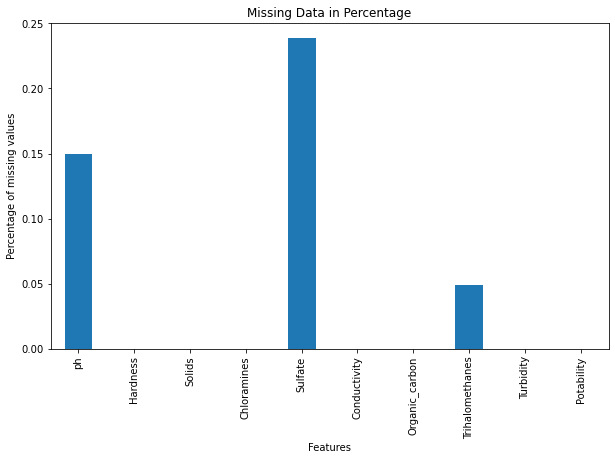

In [42]:
df.isnull().mean().plot.bar(figsize = (10, 6))
plt.title('Missing Data in Percentage')
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')

In [43]:
df.ph = df.ph.fillna(df.ph.mean())

In [44]:
df.Sulfate = df.Sulfate.fillna(df.Sulfate.mean())

In [45]:
df.Trihalomethanes = df.Trihalomethanes.fillna(df.Trihalomethanes.mean())

In [46]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [47]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

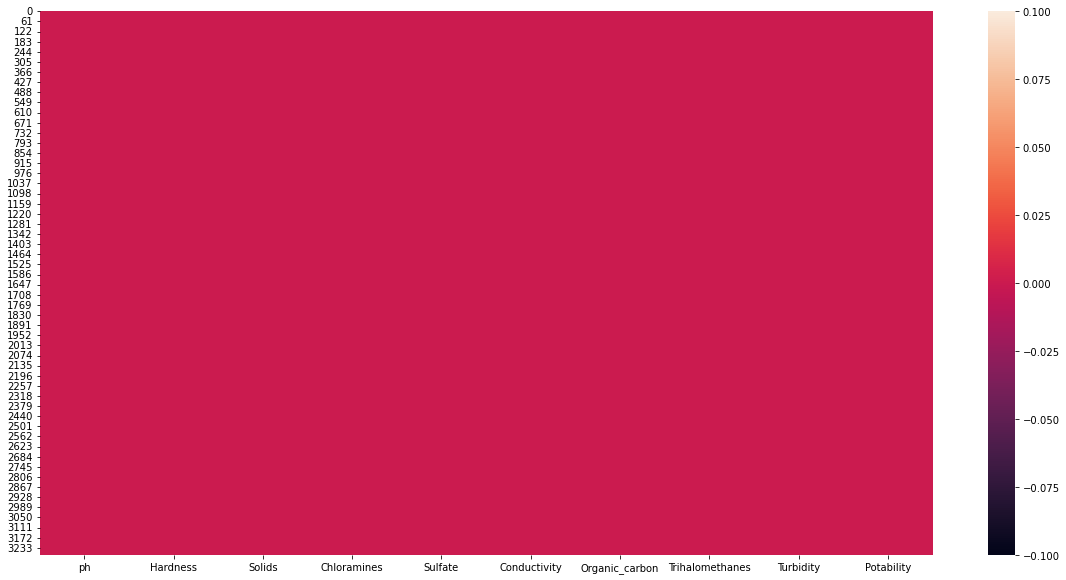

In [48]:
sns.heatmap(df.isnull())

# Modeling

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop('Potability', axis=1)
y = df.Potability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.81482114, -0.28383166,  1.69805484, ..., -0.86790121,
         0.68057373, -0.41286298],
       [-0.50674381, -1.17305797, -0.77620121, ..., -1.53308051,
        -1.81970934,  1.90799769],
       [-2.01624159, -0.45103038,  0.41696773, ..., -1.5005676 ,
        -1.27513582,  0.24327549],
       ...,
       [-1.50004651, -0.69662437, -0.83310727, ..., -1.98036332,
        -1.77565489, -1.06734861],
       [-0.59207976,  0.22708309, -0.74113018, ...,  0.1076333 ,
         0.2699133 ,  0.21995631],
       [ 0.42441877,  1.04895157, -1.67879997, ..., -0.00354071,
         0.47523679,  0.25739572]])

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_model = LogisticRegression()

In [56]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [57]:
pred_log = log_model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [59]:
lg = accuracy_score(y_test, pred_log)
print(lg)

0.38657171922685657


In [60]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       603
           1       0.39      1.00      0.56       380

    accuracy                           0.39       983
   macro avg       0.19      0.50      0.28       983
weighted avg       0.15      0.39      0.22       983



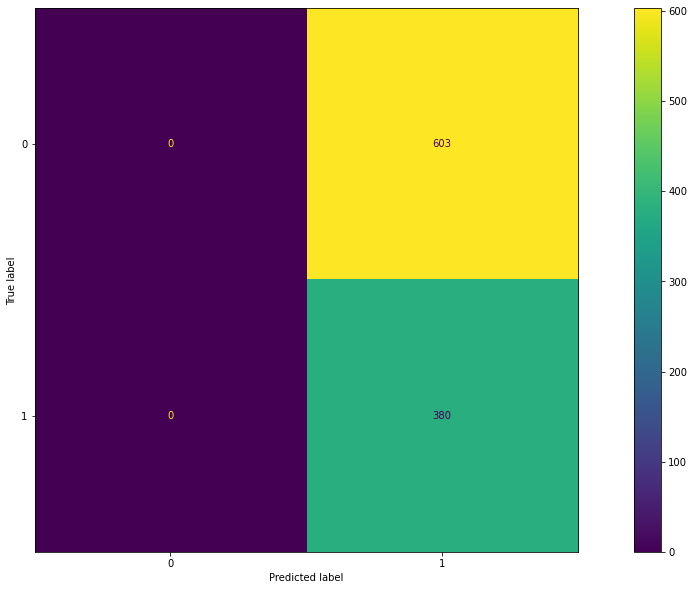

In [61]:
cm_log = confusion_matrix(y_test, pred_log)
ConfusionMatrixDisplay(confusion_matrix=cm_log).plot()

## Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_model = DecisionTreeClassifier()

In [64]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
pred_dt = dt_model.predict(X_test)

In [66]:
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6134282807731435


In [67]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       603
           1       0.50      0.00      0.01       380

    accuracy                           0.61       983
   macro avg       0.56      0.50      0.38       983
weighted avg       0.57      0.61      0.47       983



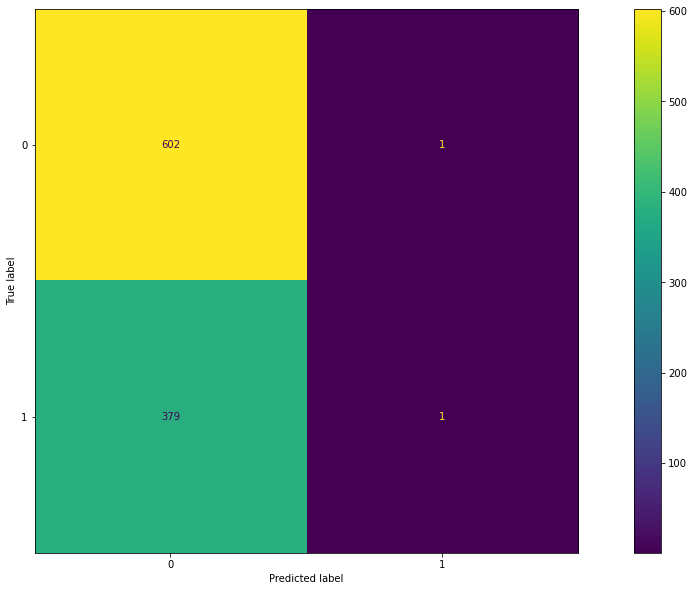

In [68]:
cm_dt = confusion_matrix(y_test, pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()

## Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_model = RandomForestClassifier()

In [71]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
pred_rf = rf_model.predict(X_test)

In [73]:
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.38657171922685657


In [74]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       603
           1       0.39      1.00      0.56       380

    accuracy                           0.39       983
   macro avg       0.19      0.50      0.28       983
weighted avg       0.15      0.39      0.22       983



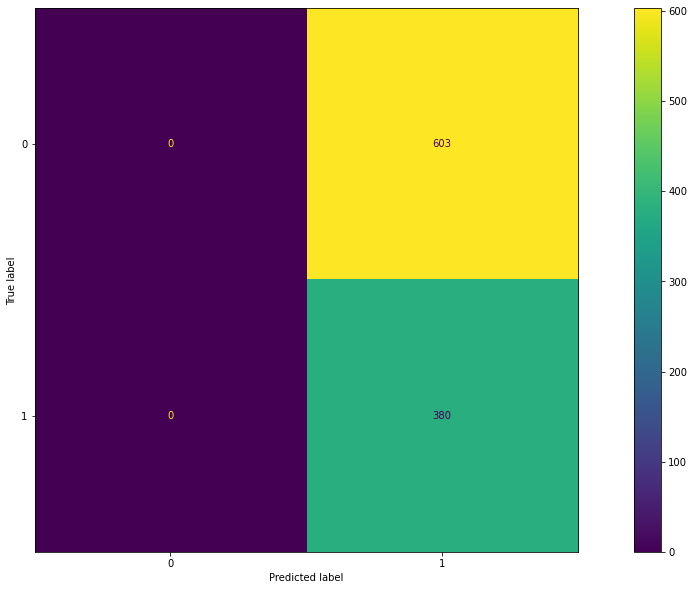

In [75]:
cm_rf = confusion_matrix(y_test, pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()

## XGBoost Classifier

In [76]:
from xgboost import XGBClassifier

In [77]:
xgb_model = XGBClassifier()

In [78]:
xgb_model.fit(X_train, y_train)

[10:31:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
pred_xgb = xgb_model.predict(X_test)

In [80]:
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6134282807731435


In [81]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       603
           1       0.50      0.00      0.01       380

    accuracy                           0.61       983
   macro avg       0.56      0.50      0.38       983
weighted avg       0.57      0.61      0.47       983



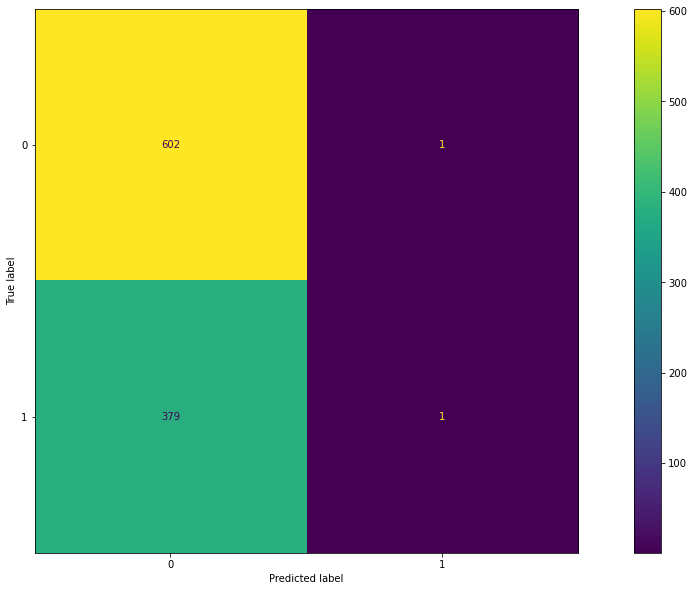

In [82]:
cm_xgb = confusion_matrix(y_test, pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot()

## K-Nearest Neighbours

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn_model = KNeighborsClassifier()

In [85]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
pred_knn = knn_model.predict(X_test)

In [87]:
knn = accuracy_score(y_test, pred_knn)
print(knn)

0.6144455747711088


In [88]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       603
           1       1.00      0.00      0.01       380

    accuracy                           0.61       983
   macro avg       0.81      0.50      0.38       983
weighted avg       0.76      0.61      0.47       983



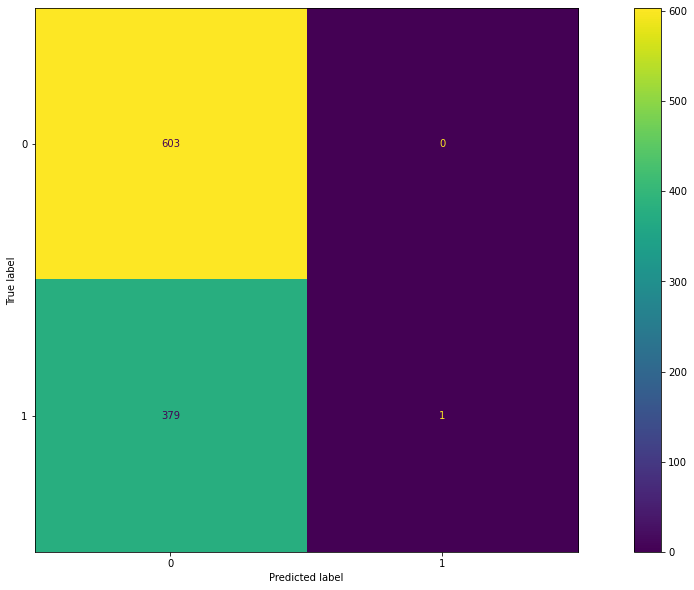

In [89]:
cm_knn = confusion_matrix(y_test, pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot()

## Support Vector Machine

In [90]:
from sklearn.svm import SVC, LinearSVC

In [91]:
svm_model = SVC()

In [92]:
svm_model.fit(X_train, y_train)

SVC()

In [93]:
pred_svm = svm_model.predict(X_test)

In [94]:
svm = accuracy_score(y_test, pred_svm)
print(svm)

0.38657171922685657


In [95]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       603
           1       0.39      1.00      0.56       380

    accuracy                           0.39       983
   macro avg       0.19      0.50      0.28       983
weighted avg       0.15      0.39      0.22       983



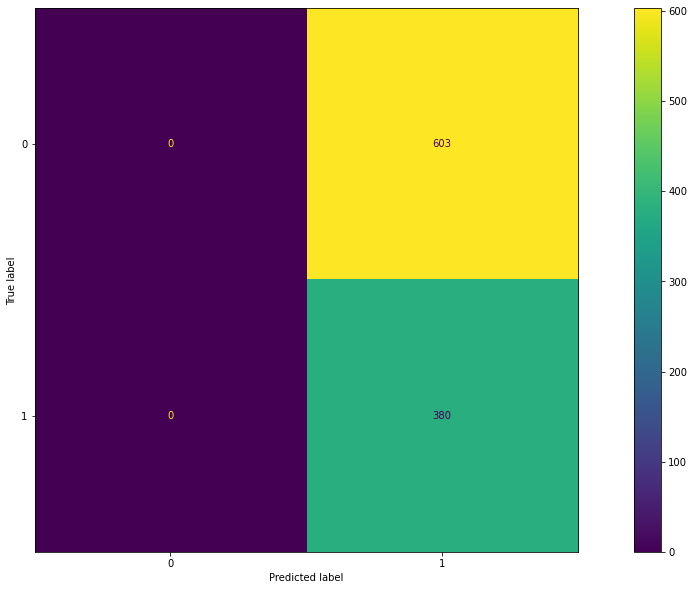

In [96]:
cm_svm = confusion_matrix(y_test, pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot()

## AdaBoost Classifier

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
ada_model = AdaBoostClassifier(learning_rate= 0.002, n_estimators= 205)

In [99]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205)

In [100]:
pred_ada = ada_model.predict(X_test)

In [101]:
ada = accuracy_score(y_test, pred_ada)

In [102]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       603
           1       0.00      0.00      0.00       380

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.38      0.61      0.47       983



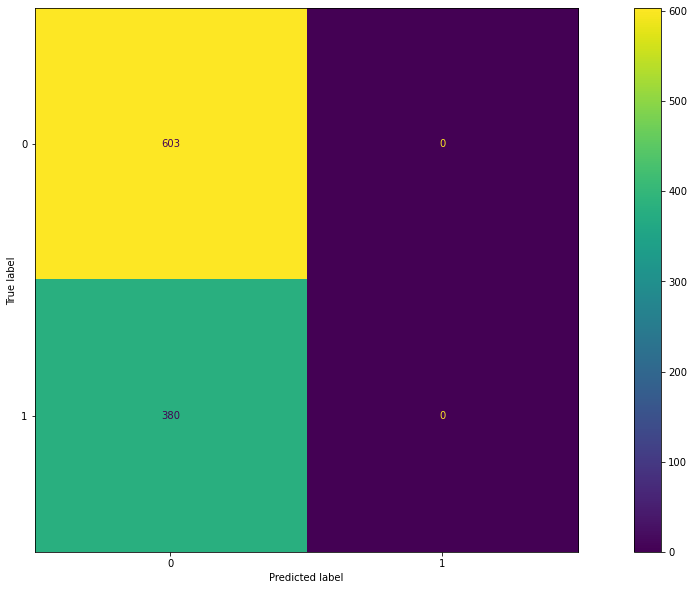

In [103]:
cm_ada = confusion_matrix(y_test, pred_ada)
ConfusionMatrixDisplay(confusion_matrix=cm_ada).plot()

In [104]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, knn, svm, ada]
})
models

Model  Accuracy_score
0  Logistic Regression        0.386572
1        Decision Tree        0.613428
2        Random Forest        0.386572
3              XGBoost        0.613428
4          KNeighbours        0.614446
5                  SVM        0.386572
6             AdaBoost        0.613428

<AxesSubplot:xlabel='Accuracy_score', ylabel='Model'>

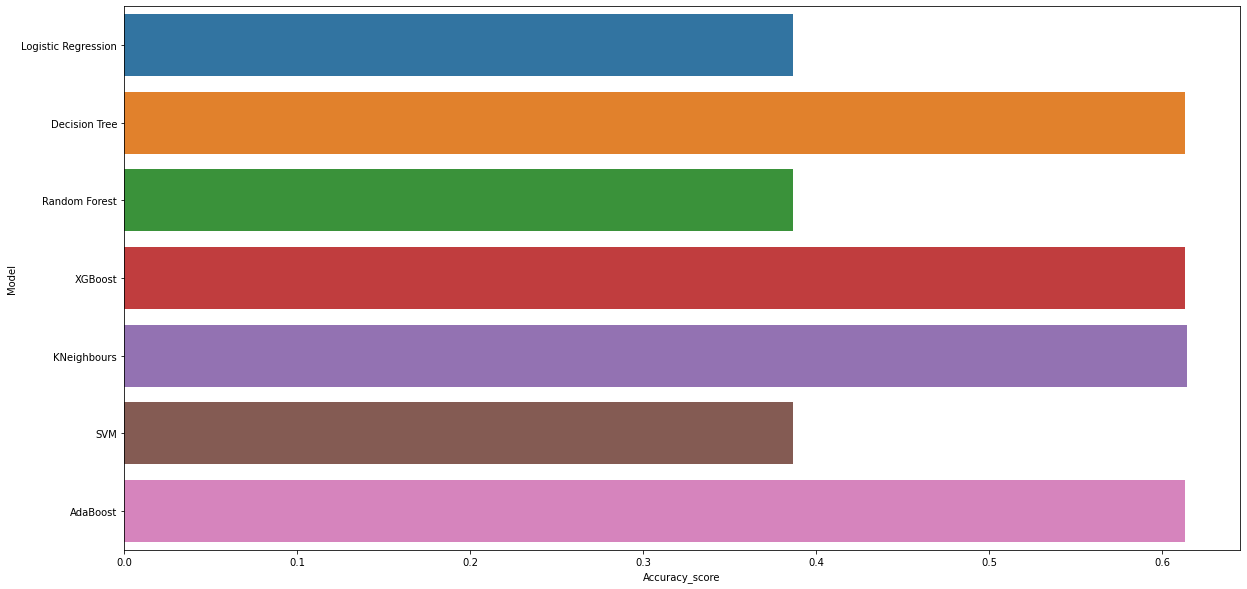

In [105]:
sns.barplot(x='Accuracy_score', y='Model', data=models)

Authored By:

**[Soumya Kushwaha](https://github.com/Soumya-Kushwaha)**